# **Analysis of the dataset**
This dataset contains information about sleep quality based on multiple factors, such as age, BMI, stress level, etc.

Based on informations and factors affecting sleep health, we can evaluate the following dataset by analyzing several differences:

**Basic Patterns**
1. What is the average sleep duration for different age groups?
2. How does BMI vary with sleep duration?
3. Is there a relationship between age and sleep duration?

**Correlations & Relationships**
1. Does sleep duration correlate with BMI?
2. How does physical activity level affect sleep quality?
3. Is there a trend between sleep duration and stress levels?

**Comparisons & Group Differences**
1. Do males and females have different sleep patterns?
2. How does sleep duration differ among different BMI categories (underweight, normal, overweight, obese)?
3. Are there significant differences in sleep duration based on disorders or lifestyle factors?

To begin the analysis, we'll need to clean the dataset, handle missing values, and ensure the data types are correct. Then, we'll use various visualization techniques to explore the relationships between sleep quality factors and sleep duration. Finally, we'll perform the advanced analysis to predict sleep quality based on other factors.

Let's start by importing the necessary libraries and loading the dataset.

## Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Preview dataset

In [3]:
sleep_health = pd.read_csv('sleep_health_lifestyle_dataset.csv')
sleep_health.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia
5,6,Female,47,Student,6.1,6.9,24,4,Normal,123/60,87,9485,NaN
6,7,Male,22,Office Worker,5.1,6.1,26,6,Obese,121/70,66,15680,NaN
7,8,Male,49,Office Worker,10.7,6.2,49,8,Obese,134/87,59,18767,NaN
8,9,Male,25,Manual Labor,11.9,7.2,27,8,Underweight,112/63,99,16397,Sleep Apnea
9,10,Female,51,Retired,8.2,4.0,64,5,Overweight,125/84,76,12744,NaN


## Data cleaning

In [4]:
# Drop rows with any missing values
sleep_health_cleaned = sleep_health.dropna()

# Remove duplicate rows
sleep_health_cleaned = sleep_health_cleaned.drop_duplicates()

# Convert data types if necessary (example: converting 'Age' column to integer)
# sleep_health_cleaned['Age'] = sleep_health_cleaned['Age'].astype(int)

# Display the cleaned dataset
sleep_health_cleaned.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia
8,9,Male,25,Manual Labor,11.9,7.2,27,8,Underweight,112/63,99,16397,Sleep Apnea
12,13,Male,54,Office Worker,4.1,6.8,113,9,Obese,137/90,70,15440,Sleep Apnea
18,19,Female,26,Manual Labor,9.2,6.4,93,9,Underweight,113/65,78,9957,Sleep Apnea
19,20,Male,27,Manual Labor,10.6,8.1,94,8,Normal,113/63,58,17796,Insomnia
21,22,Male,45,Office Worker,4.1,5.1,41,8,Normal,122/77,75,12627,Insomnia
23,24,Female,52,Manual Labor,11.2,5.9,55,10,Overweight,126/78,77,6933,Insomnia
24,25,Female,40,Office Worker,11.0,5.7,30,4,Overweight,120/77,66,16295,Insomnia
26,27,Female,36,Retired,8.8,7.3,41,6,Overweight,118/71,90,2203,Insomnia
31,32,Male,47,Retired,7.1,6.8,56,2,Underweight,123/74,89,3093,Insomnia


### ***Starting from basic patterns:***

We can now start by calculating the average duration for sleeping of each group of age, varying from 18 years old to above 65 years old, and hence predicting the cause of its difference.
#### Adult age group's average sleep duration:

In [5]:
adult_age = sleep_health_cleaned.loc[(sleep_health_cleaned['Age'] >= 18) & (sleep_health_cleaned['Age'] < 25)]
adult_age.head(10)
adult_mean_sleep = adult_age['Sleep Duration (hours)'].mean()
adult_mean_sleep = float("{:.2f}".format(adult_mean_sleep))
adult_mean_sleep

7.66

We repeat the same step for middle-aged group and senior age group:

#### Middle-aged age group's average sleep duration:

In [6]:
middled_age = sleep_health_cleaned.loc[(sleep_health_cleaned['Age'] >= 25) & (sleep_health_cleaned['Age'] < 60)]
middled_age.head(10)
middled_mean_sleep = middled_age['Sleep Duration (hours)'].mean()
middled_mean_sleep = float("{:.2f}".format(middled_mean_sleep))
middled_mean_sleep

8.24

#### Senior age group's average sleep duration:

In [7]:
senior_age = sleep_health_cleaned.loc[(sleep_health_cleaned['Age'] >= 60)]
senior_age.head(10)
senior_mean_sleep = senior_age['Sleep Duration (hours)'].mean()
senior_mean_sleep = float("{:.2f}".format(senior_mean_sleep))
senior_mean_sleep

7.87

It can be depicted that the sleep duration of the senior age group is the highest. Shorter sleep duration for the age group between 18 - 50 can be caused by the quantity of workload, since this is the main age group of workers worldwide, and in the US in particular. 

In addition, the adult age group (18 - 25) are known to be more active in social activities than the two other age groups, thus spending less time for sleeping. In contrary, most of the population in the senior age group had retirement, and according to reports, elder people are likely to rest sooner, since they don't have much time working (or don't have to). This would be a factor affecting higher sleep duration in this age group.

Now, let's examine how BMI affects sleep duration. We will create a scatter plot to visualize this relationship:

#### BMI vs Sleep Duration:

In [8]:
sns.set_theme(style="whitegrid")
sns.barplot(data=sleep_health_cleaned, x='BMI Category', y='Sleep Duration (hours)', 
            palette=sns.color_palette(), estimator=np.median, errorbar=('ci', 45), hue='BMI Category', legend=False)

C:\Users\Huy Hung\AppData\Local\Temp\ipykernel_8668\4060444978.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=sleep_health_cleaned, x='BMI Category', y='Sleep Duration (hours)',


<Axes: xlabel='BMI Category', ylabel='Sleep Duration (hours)'>

From the diagram, we can see that higher BMI values tend to have higher sleep durations overall. This is an expected result as BMI is a measure of body fat percentage, and higher body fat percentage can lead to sleep apnea and other sleep disorders that can affect sleep duration.

Now, to further explore the relationship between age and sleep duration, we can perform a correlation analysis:

#### Correlation between Age and Sleep Duration:

Since our age span is large, we will seperate each age group and compare their sleep duration variations.

##### **Adult Age**:

In [9]:
adult_age = sleep_health_cleaned.loc[(sleep_health_cleaned['Age'] >= 18) & (sleep_health_cleaned['Age'] < 25)]
sns.lineplot(data=adult_age, x='Age', y='Sleep Duration (hours)', legend=False, estimator=np.median)

<Axes: xlabel='BMI Category', ylabel='Sleep Duration (hours)'>

#### **Middled-age group:**

In [10]:
sns.lineplot(data=middled_age, x='Age', y='Sleep Duration (hours)', legend=False, estimator=np.median)

<Axes: xlabel='BMI Category', ylabel='Sleep Duration (hours)'>

#### **Senior age**:

In [11]:
sns.lineplot(data=senior_age, x='Age', y='Sleep Duration (hours)', legend=False, estimator=np.median)

<Axes: xlabel='BMI Category', ylabel='Sleep Duration (hours)'>

As we can deduce from the 3 plots, aging doesn't have much visible and important effect on sleep duration, as it fluctuates throughout the total age groups. However, based on what we have studied previously, we can analyze its variation and link it with the Tcauses previously studied.

The plot of the senior group is probably the easiest to analyze, as we can see directly from what range of age they have increasing sleep duration **(64-90+ years old)**.

### ***Correlations and Relationships: Sleep Quality and other factors***

For other factors, we can analyze the relationship between sleep duration and BMI, and thus know how physical activities can affect sleep quality, both negatively and positively.

First, it is necessary to know the correlation between average sleep duration and BMI indexes.

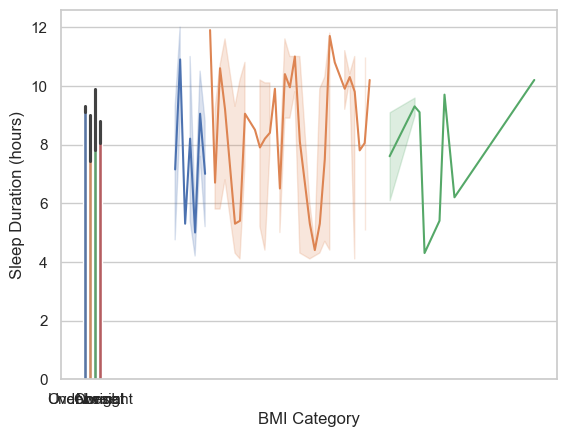

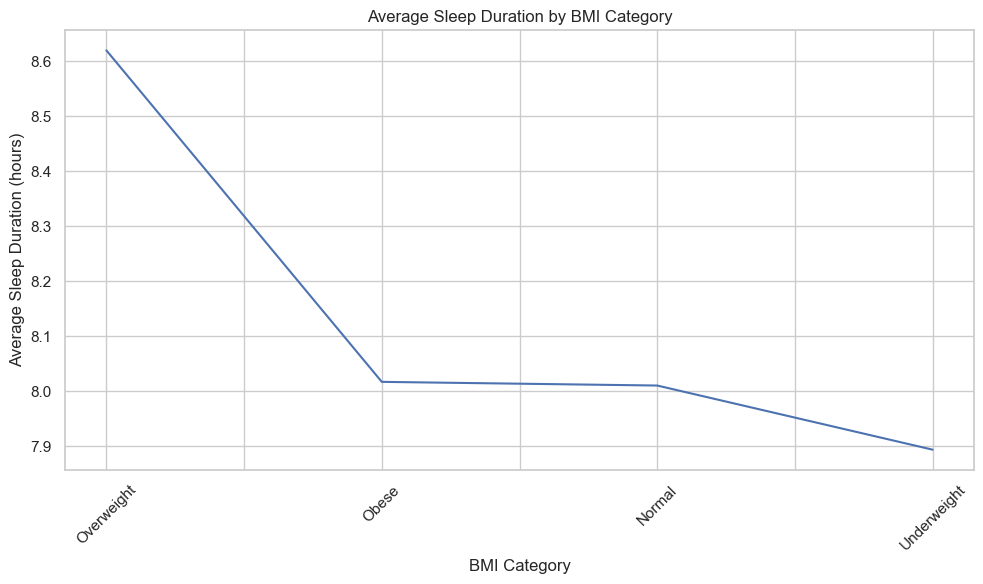

Average Sleep Duration by BMI Category:
BMI Category
Overweight     8.62
Obese          8.02
Normal         8.01
Underweight    7.89
Name: Sleep Duration (hours), dtype: float64


In [12]:
# Calculate average sleep duration for each BMI category
avg_sleep_by_bmi = sleep_health_cleaned.groupby('BMI Category')['Sleep Duration (hours)'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_sleep_by_bmi.plot(kind='line')
plt.title('Average Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the average sleep duration for each BMI category
print("Average Sleep Duration by BMI Category:")
print(avg_sleep_by_bmi.round(2))

It is clear that the average sleep duration is proportional to the BMI index of the average of people in the dataset. While underweight and normal people have a sleep duration of around 8 hours (7.8 to 8 hours of sleep), people with a higher BMI index has a rocketed duration of sleep, up to aproximately 8.6 hours of sleep. 
This is mainly caused by health problems they have to deal with, as mentioned in the previous part.

Next, let's analyze the relationship between sleep duration and physical activity level. We will create a scatter plot to visualize this relationship:

#### **Scatter plot: Sleep Duration vs Physical Activity Level:**

Correlation coefficient between Physical Activity Level and Sleep Duration: 0.07


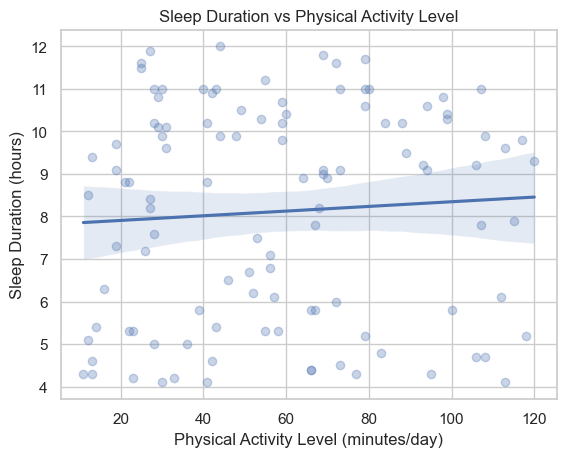

In [13]:
# Calculate the correlation coefficient
correlation = sleep_health_cleaned['Physical Activity Level (minutes/day)'].corr(sleep_health_cleaned['Sleep Duration (hours)'])
print(f"Correlation coefficient between Physical Activity Level and Sleep Duration: {correlation:.2f}")

# Display the regplot again for reference
sns.regplot(data=sleep_health_cleaned, x='Physical Activity Level (minutes/day)', y='Sleep Duration (hours)', scatter_kws={'alpha':0.3})
plt.title('Sleep Duration vs Physical Activity Level')
plt.xlabel('Physical Activity Level (minutes/day)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

As shown in the figure above, the correlation coefficient between Physical Activity Level and Sleep Duration is 0.07, which depicts a slight positive proportion between sleep duration and physical activity level. In short terms, more time you spend working out, more time you need to sleep.

To elaborate further:

1. Weak Positive Correlation: The correlation coefficient of 0.07 indicates a very weak positive relationship. This means that while there is a tendency for sleep duration to increase with physical activity level, the relationship is not strong or consistent across the dataset.

2. Scatter Plot Distribution: The scatter plot likely shows a wide dispersion of data points, without a clear linear pattern. This visual representation reinforces the weak correlation found.

3. Individual Variability: The weak correlation suggests that individual factors play a significant role. Some people might need more sleep after intense physical activity, while others might not show significant changes in their sleep patterns.

4. Other Influencing Factors: The weak correlation also implies that other factors not shown in this particular analysis (such as age, stress levels, or overall health) might have a more substantial impact on sleep duration than physical activity alone.

5. Potential Non-linear Relationship: It's possible that the relationship between physical activity and sleep duration is not strictly linear. There might be an optimal range of physical activity that promotes better sleep, beyond which the benefits plateau or even decrease.

6. Need for Further Investigation: This weak correlation warrants further investigation into subgroups within the data. For instance, the relationship might be stronger for certain age groups or for individuals with specific health conditions.

In conclusion, while there is a slight positive relationship between physical activity level and sleep duration, the correlation is weak. This suggests that increasing physical activity might have a small beneficial effect on sleep duration, but it's likely just one of many factors influencing sleep patterns.

Now, let's perform a hypothesis test to determine if there is a significant difference in sleep duration between people who have regular physical activity and those who don't. We will use a t-test for this purpose.

In [14]:
from scipy.stats import ttest_ind

# Define a threshold for regular physical activity (e.g., 30 minutes/day)
threshold = 30

# Split the data into two groups based on the threshold
regular_activity = sleep_health_cleaned[sleep_health_cleaned['Physical Activity Level (minutes/day)'] >= threshold]
no_regular_activity = sleep_health_cleaned[sleep_health_cleaned['Physical Activity Level (minutes/day)'] < threshold]

# Perform the t-test
t_stat, p_value = ttest_ind(regular_activity['Sleep Duration (hours)'], no_regular_activity['Sleep Duration (hours)'])

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in sleep duration between people who have regular physical activity and those who don't.")
else:
    print("There is no significant difference in sleep duration between people who have regular physical activity and those who don't.")

T-statistic: 0.64
P-value: 0.5257
There is no significant difference in sleep duration between people who have regular physical activity and those who don't.


To conclude the correlations' analysis, we will predict if there exists a trend between stress levels and sleep duration. For this, we will be using a bar plot, with a regression line.

C:\Users\Huy Hung\AppData\Local\Temp\ipykernel_8668\539668376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sleep_health_cleaned, x='Stress Level (scale: 1-10)', y='Sleep Duration (hours)', palette='pastel', estimator=np.mean)
C:\Users\Huy Hung\AppData\Local\Temp\ipykernel_8668\539668376.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


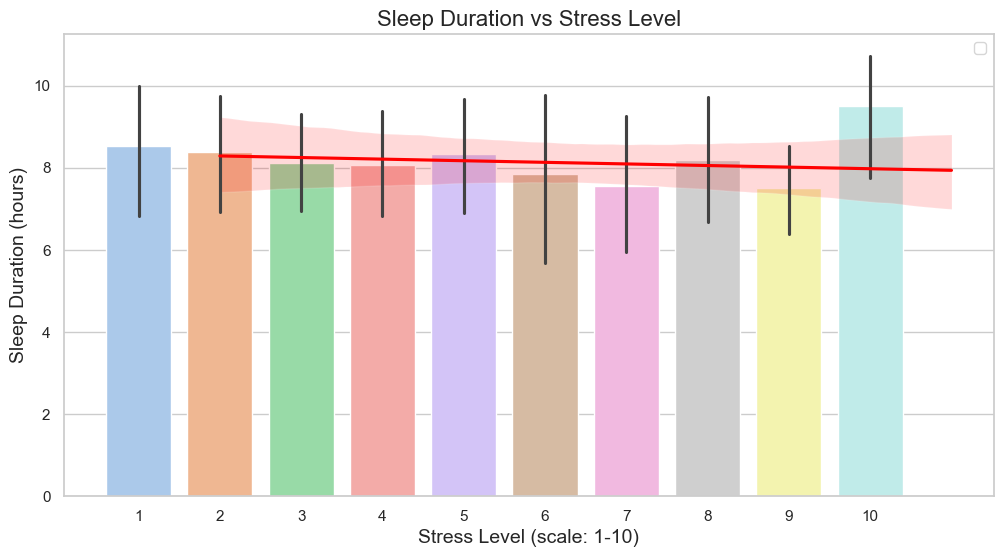

In [15]:
#### Bar Plot: Sleep Duration vs Stress Level:
plt.figure(figsize=(12, 6))
sns.barplot(data=sleep_health_cleaned, x='Stress Level (scale: 1-10)', y='Sleep Duration (hours)', palette='pastel', estimator=np.mean)

# Add a regression line
sns.regplot(data=sleep_health_cleaned, x='Stress Level (scale: 1-10)', y='Sleep Duration (hours)', scatter=False, color='red', line_kws={'label': 'Regression Line'})

# Add title and labels
plt.title('Sleep Duration vs Stress Level', fontsize=16)
plt.xlabel('Stress Level (scale: 1-10)', fontsize=14)
plt.ylabel('Sleep Duration (hours)', fontsize=14)
plt.legend()
plt.show()

The regression line is slightly decreasing, meaning that the relationship between two factors is weakly established, and it needs more outside factors to be completely analyzed. Nonetheless, we can conclude in overall that more stressed you are, less time you spend sleeping.

### ***Comparisons and Differences***

For this part of the analysis, we have to deal with data, by grouping and filtering with particular factors, we will examine the differences of sleep quality between factors given, hence having more details for analyzing.

Firstly, we will separate sleep durations between males and females then compare basing on sleep quality and average duration.

#### **Sleep Duration by Gender:**

In [35]:
# Calculate the mean sleep duration for males and females
grouped = sleep_health_cleaned.groupby('Gender')
comparison = grouped.agg({'Sleep Duration (hours)': 'mean'})
comparison 

,Sleep Duration (hours)
Gender,
Female,8.001887
Male,8.219298


C:\Users\Huy Hung\AppData\Local\Temp\ipykernel_8668\1993264167.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Gender', y='Sleep Duration (hours)', data=sleep_health_cleaned, estimator=lambda x: sum(x)/len(x), ci=95,  # Confidence interval
C:\Users\Huy Hung\AppData\Local\Temp\ipykernel_8668\1993264167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Sleep Duration (hours)', data=sleep_health_cleaned, estimator=lambda x: sum(x)/len(x), ci=95,  # Confidence interval


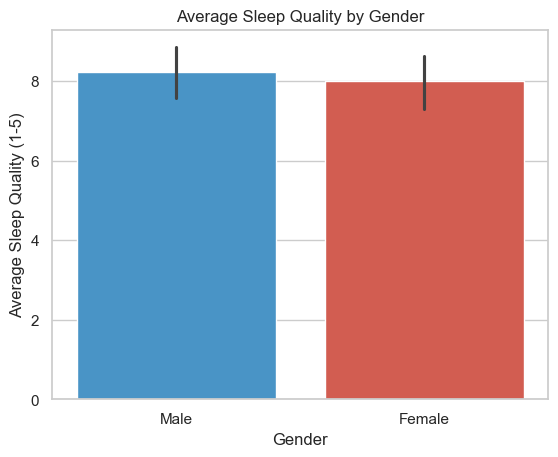

In [36]:
# Bar plot for average sleep quality by gender
sns.barplot(x='Gender', y='Sleep Duration (hours)', data=sleep_health_cleaned, estimator=lambda x: sum(x)/len(x), ci=95,  # Confidence interval
    palette={"Male": "#3498db", "Female": "#e74c3c"})  # Custom colors)

# Titles and labels
plt.title('Average Sleep Quality by Gender')
plt.ylabel('Average Sleep Quality (1-5)')
plt.xlabel('Gender')

# Show plot
plt.show()

It is clear from both plots that males have slightly less sleep than females, but their quality are mostly better comparing to those for females. 
We can explain this by looking at some common causes: 
- **Hormonal Changes in Women** – Women experience hormonal fluctuations due to menstruation, pregnancy, and menopause, which can disrupt sleep.

- **Sleep Disorders in Women** – Some women may have sleep disorders like insomnia, restless leg syndrome, or sleep apnea, which can interfere with sleep quality.

- **Caregiving & Household Duties** – Women (especially mothers) often take on more childcare and household responsibilities, leading to shorter sleep durations.

- **Work & Sleep Prioritization** – Men may be more likely to prioritize sleep recovery, while women tend to balance multiple roles.

In short terms, women tend to sleep less because of disorders, responsabilities that societies heavily put on their shoulders, and also prejudices comparing to men in different countries in the world.

To conclude this analysis, we will examine the effect of Sleep Disorders to sleep quality.

#### **Sleep Duration vs. Occupation & Lifestyle Factors**

C:\Users\Huy Hung\AppData\Local\Temp\ipykernel_8668\750747430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Sleep Duration (hours)', data=sleep_health_cleaned, palette="Set2")


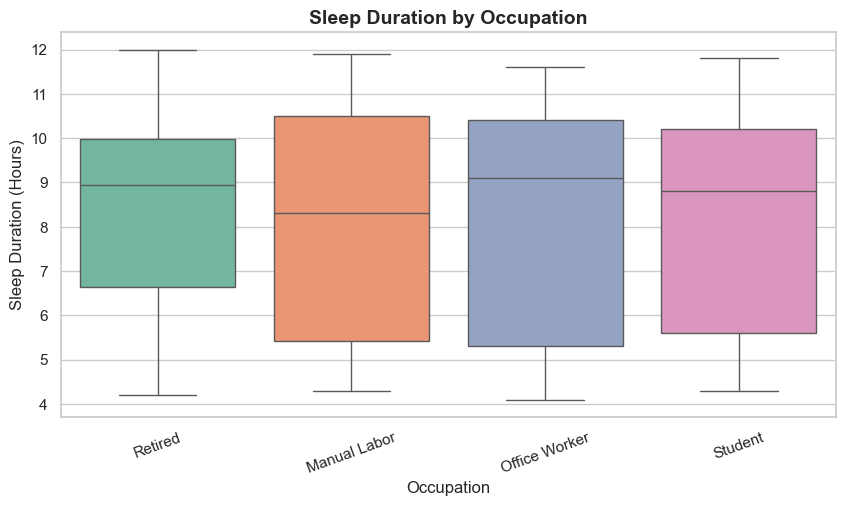

In [43]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x='Occupation', y='Sleep Duration (hours)', data=sleep_health_cleaned, palette="Set2")

plt.xticks(rotation=20)
plt.title('Sleep Duration by Occupation', fontsize=14, fontweight='bold')
plt.ylabel('Sleep Duration (Hours)')
plt.xlabel('Occupation')

plt.show()

Key observations:
- **Manual Labor**: Individuals in manual labor tend to have a wider range of sleep durations, with some experiencing very short sleep durations and others having longer sleep durations.
- **Office Workers**: Office workers generally have a more consistent sleep duration, but there are still notable outliers with both short and long sleep durations.
- **Students**: Students show a wide range of sleep durations, similar to manual laborers, which could be attributed to varying schedules and workloads.
- **Retired Individuals**: Retired individuals tend to have longer sleep durations on average, which aligns with the previous analysis of senior age groups having higher sleep durations.

Overall, the plot highlights the impact of occupation on sleep duration, with certain occupations showing more variability and others being more consistent. 

#### **In conclusion, this analysis provides particular and valuable insights into how lifestyle factors, such as occupation, body index or disorders, can influence sleep patterns and quality.**